In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
from keras.utils import to_categorical

Using TensorFlow backend.


Market share is the percent of total sales in an industry generated by a particular company. 
Market share is calculated by taking the company's sales over the period and dividing it by the total sales of the industry over the same period.

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pathPrefix = '/content/drive/My Drive'+'/yapaitek/'
data_filename = 'data.csv'
test_filename = 'test.csv'
data = pd.read_csv(pathPrefix + data_filename)
test = pd.read_csv(pathPrefix + test_filename)
data['Start_time'] = pd.to_datetime(data['Start_time'])
data['End_time'] = pd.to_datetime(data['End_time'])
test['Start_time'] = pd.to_datetime(test['Start_time'])
test['End_time'] = pd.to_datetime(test['End_time'])

In [0]:
data['Start_timestamp'] = data.Start_time.values.astype(np.int64) // 10 ** 9
data['End_timestamp'] = data.End_time.values.astype(np.int64) // 10 ** 9
test['Start_timestamp'] = test.Start_time.values.astype(np.int64) // 10 ** 9
test['End_timestamp'] = test.End_time.values.astype(np.int64) // 10 ** 9

In [0]:
data['Start_hour'] = data['Start_time'].dt.time
data['Start_day'] = data['Start_time'].dt.date
test['Start_hour'] = data['Start_time'].dt.time
test['Start_day'] = data['Start_time'].dt.date

In [0]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

def label_split(df):
  y_data = df['Market Share_total']
  x_data = df.drop(['Market Share_total'], axis = 1)
  return y_data, x_data

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
def evaluate(y_true, y_pred):
  MAE = mean_absolute_error(y_true, y_pred)
  R_Squared = r2_score(y_true, y_pred)
  return MAE,R_Squared

In [0]:
train, validate, test = train_validate_test_split(data)
y_train, x_train = label_split(train)
y_test, x_test = label_split(test)
y_validate, x_validate = label_split(validate)
#same values of mean,std in values in separated data 

In [0]:
data.columns

Index(['Unnamed: 0', 'Episode', 'Station', 'Channel Type', 'Season', 'Year',
       'Date', 'Day of week', 'Start_time', 'End_time', 'Length',
       'Name of show', 'Name of episode', 'Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total',
       'Temperature in Montreal during episode'],
      dtype='object')

In [0]:
len(data)

616656

In [0]:
nan_ep_name = []
for i in range(len(data)):
  if str(data['Temperature in Montreal during episode'].iloc[i]) == 'nan':
    nan_ep_name.append(i)

In [0]:
nan_ep_name = []
for i in range(len(data)):
  if str(data['Name of episode'].iloc[i]) == 'nan':
    nan_ep_name.append(i)

In [0]:
data.head

In [0]:
with_val = []
for ind_i in nan_ep_name:
  ind_v = []
  for i in range(len(data)):
    if i>ind_i-4000 and i < ind_i+8000:
      if data['Name of show'].iloc[i] == data['Name of show'].iloc[ind_i] and str(data['Name of episode'].iloc[i]) != 'nan':
        ind_v.append(i)
    if len(ind_v)>0:
      with_val.append(i)

KeyboardInterrupt: ignored

In [0]:
for item in ind_v:
  print(item)  
  print(data['Name of show'].iloc[item])
  print(data['Name of episode'].iloc[item])

In [0]:
len(nan_ep_name)

83344

In [0]:
for i in range(len(data)):
  if data['Episode'].iloc[i] != data['Name of show'].iloc[i]:
    print(i)

In [0]:
for i in range(len(data)):
  if str(data['Start_time'].iloc[i]) == 'nan' or str(data['End_time'].iloc[i]) == 'nan':
    print(i)

141193
141230
141259
141312
141338
141366
141398
141448
141480
141507
141545
141575
141628
141652
141691
141692
141740
141741
141850
141851
141879
141880
399438
399486
399561
399562
399578
399579
399610
399667
399699
399731
399757
399795
399826
399873
399900
399993
399994
400024
400025
400106
400133


In [0]:
len(ind_nan_time)

43

In [0]:
ind_nan_time = [
                141193,
141230,
141259,
141312,
141338,
141366,
141398,
141448,
141480,
141507,
141545,
141575,
141628,
141652,
141691,
141692,
141740,
141741,
141850,
141851,
141879,
141880,
399438,
399486,
399561,
399562,
399578,
399579,
399610,
399667,
399699,
399731,
399757,
399795,
399826,
399873,
399900,
399993,
399994,
400024,
400025,
400106,
400133
]

In [0]:
141193
2017-03-23 00:00:00
2017-03-23 02:00:00

In [0]:
data['Name of show'].iloc[141230]

'RDI économie'

In [0]:
for item in ind_v:
  print(item)  
  print(data['Length'].iloc[item])
  print(data['Start_time'].iloc[item])
  print(data['End_time'].iloc[item])

6331
4
2016-09-07 18:00:00
2016-09-07 19:00:00
6976
4
2016-09-08 03:00:00
2016-09-08 04:00:00
8306
4
2016-09-10 12:30:00
2016-09-10 13:30:00
21381
4
2016-09-29 18:00:00
2016-09-29 19:00:00
22035
4
2016-09-30 03:00:00
2016-09-30 04:00:00
23419
4
2016-10-02 20:00:00
2016-10-02 21:00:00
26928
2
2016-10-07 18:00:00
2016-10-07 18:30:00
26932
2
2016-10-07 00:30:00
2016-10-07 01:00:00
36668
2
2016-10-21 03:00:00
2016-10-21 03:30:00
49134
2
2016-11-08 18:00:00
2016-11-08 18:30:00
49845
4
2016-11-09 18:00:00
2016-11-09 19:00:00
49854
4
2016-11-09 01:00:00
2016-11-09 02:00:00
120919
4
2017-02-20 18:00:00
2017-02-20 19:00:00
121582
4
2017-02-21 03:00:00
2017-02-21 04:00:00
125095
4
2017-02-26 20:00:00
2017-02-26 21:00:00
141230
3
nan
nan
141619
3
2017-03-22 18:15:00
2017-03-22 19:00:00
145739
3
2017-03-28 18:15:00
2017-03-28 19:00:00
146018
3
2017-03-29 02:00:00
2017-03-29 02:45:00
186889
2
2017-05-26 18:00:00
2017-05-26 18:30:00
195110
4
2017-06-07 18:00:00
2017-06-07 19:00:00
197856
4
2017-06-1

In [0]:
ind_v = []
ind_i = 141230
for i in range(len(data)):
  #if i>ind_i-4000 and i < ind_i+ind_i-1000:
  if data['Name of show'].iloc[i] == data['Name of show'].iloc[ind_i]:
    ind_v.append(i)

In [0]:
for item in data.loc[data['Name of show'] == 'Infopublicité' and ]['Length']:
  print(item)

In [0]:
for item in ind_nan_time:
  print(data['Name of show'].iloc[item], item)

Infopublicité 141193
RDI économie 141230
CINÉ-LUNE 141259
Point Doc 141312
Hockey LAH Rocket de Laval - R 141338
Maîtres tatoueurs 141366
Sports 30 24h-6h 141398
22 Mars Ensemble 141448
Médium 141480
Croisières de rêve 141507
Appalaches: la guerre du ginseng 141545
La loi et l'ordre - Crimes sexuels 141575
National, Le 141628
Élémentaire 141652
Danseuses 141691
Humoristes sur appel 141692
Robot Chicken 141740
Archer 141741
Direction: Sud 141850
Complément de programme canadien 141851
Nouveau show, Le 141879
Downton Abbey 141880
Infopublicité 399438
Entrée principale 399486
Génial! 399561
Cuisine futée, parents pressés 399562
Kalamouche R 399578
Vacances Nature R 399579
Adam recherche Eve 399610
TVA NOUVELLES (22h) 399667
C à vous 399699
8 heures pour la cause 399731
Je serai un homme 399757
Nos ancêtres les extraterrestres 399795
Le Mentaliste 399826
National, Le 399873
C.S.I.: les experts 399900
Les Pierrafeu 399993
Archer 399994
Claude Poirier : secrets judiciaires 400024
Claude Poir

In [0]:
tmp = []
for i in range(len(data)):
  for j in range(i+1, len(data)):
    if data['Episode'].iloc[i] == data['Episode'].iloc[j]:
      if data['Temperature in Montreal during episode'].iloc[i] != data['Temperature in Montreal during episode'].iloc[j]:
        tmp.append([i,j])
  if i%1000 == 0:
    print(i/len(data))

0.0


KeyboardInterrupt: ignored

In [0]:
for i in range(len(data)):
  if str(data['Temperature in Montreal during episode'].iloc[i]) == 'nan' and str(data['Start_time'].iloc[i]) != 'nan' :
    print(i)

In [0]:
tmp = []
for i in range(len(data)):
  for j in range(i+1, len(data)):
    if data['Episode'].iloc[i] == data['Episode'].iloc[j]:
      if data['Temperature in Montreal during episode'].iloc[i] != data['Temperature in Montreal during episode'].iloc[j]:
        tmp.append([i,j])
  if i%1000 == 0:
    print(i/len(data))

0.0


KeyboardInterrupt: ignored

In [0]:
for item in tmp:
  ep = str(data['Episode'].iloc[i])
  tmp_i = str(data['Temperature in Montreal during episode'].iloc[i])
  tmp_j = str(data['Temperature in Montreal during episode'].iloc[j])
  print(ep + ','+tmp_i+','+tmp_j)

In [0]:
len(data['Name of show'].unique())

6687

In [0]:
collections.Counter(data['First time or rerun'])

Counter({'No': 599469, 'Yes': 17187})

In [0]:
import collections

In [0]:
ep_c_val = []
for i in range(len(data)):
  if str(data['Name of episode'].iloc[i]) == 'nan':
    ep_c_val.append(data['# of episode in the season'].iloc[i])

In [0]:
collections.Counter(data['First time or rerun'])

Counter({'No': 599469, 'Yes': 17187})

In [0]:
collections.Counter(data['first '])

In [0]:
collections.Counter(ep_c_val)

Counter({'No': 2765, 'Yes': 219814})

In [0]:
data_sh = []
for item in ind_v:
  data_sh.append(data['Name of show'].iloc[item])

In [0]:
data_sh = list(set(data_sh))

In [0]:
n 

9

In [0]:
n = n+1
n_sh = data_sh[n]
print(n_sh)
data_ep_name = []
for i in range(len(data)):
  if data['Name of show'].iloc[i] == n_sh:
    data_ep_name.append(data['Name of episode'].iloc[i])
collections.Counter(data_ep_name)

La fête des joyeuses baies de Santa Pac


Counter({nan: 2})

In [0]:
collections.Counter(data_ep_name)

Counter({nan: 2})

In [0]:
gen_val = []
ep_n_val = []
ind_v = []
for i in range(len(data)):
  if str(data['Name of episode'].iloc[i]) == 'nan' and data['Movie?'].iloc[i]=='Yes':
    ind_v.append(i)
    gen_val.append(data['Genre'].iloc[i])
    ep_n_val.append(data['Movie?'].iloc[i])

In [0]:
collections.Counter(ep_n_val)

Counter({'No': 222478, 'Yes': 101})

In [0]:
collections.Counter(gen_val)

Counter({'Amateur Sports': 2142,
         'Analysis and Interpretation': 9556,
         'Animated Television Programs & Films': 19552,
         'Filler': 546,
         'Formal Education and Pre-School': 1511,
         'Game Shows': 5490,
         'General Entertainment and Human Interest': 18997,
         'Infomercials, Promotional and Corporate Videos': 3367,
         'Informal Education and Recreation and Leisure': 9301,
         'Interstitial': 5730,
         'Long-form Documentary': 9410,
         'Music Video Clips': 147,
         'Music Video Programs': 10595,
         'Music and Dance other than Music Video Programs or Clips': 3848,
         'News': 53676,
         'Ongoing Comedy Series (Sitcoms)': 3351,
         'Ongoing Dramatic Series': 24816,
         'Other Drama': 565,
         'Professional Sports': 6548,
         'Programs of Comedy Sketches, Improvision, Unscripted Works': 1988,
         'Reality Programs': 21407,
         'Religion': 712,
         'Reporting and Actua

In [0]:
len(data['Genre'].unique())

27

In [0]:
from datetime import timezone

timestamp = '2016-08-29 06:00:00'.replace(tzinfo=timezone.utc).timestamp()

TypeError: ignored

In [0]:
dt = '2016-08-29 06:00:00'

In [0]:
data.head()

Unnamed: 0  ... Temperature in Montreal during episode
0           1  ...                                 20.400
1           2  ...                                 19.125
2           3  ...                                 19.125
3           4  ...                                 18.125
4           5  ...                                 18.250

[5 rows x 20 columns]

In [0]:
nan_rows = data[data['Start_time'].isnull()]

In [0]:
daf = nan_rows[nan_rows['End_time'].isnull()]

In [0]:
daf

Unnamed: 0  ... Temperature in Montreal during episode
141193      141194  ...                                    NaN
141230      141231  ...                                    NaN
141259      141260  ...                                    NaN
141312      141313  ...                                    NaN
141338      141339  ...                                    NaN
141366      141367  ...                                    NaN
141398      141399  ...                                    NaN
141448      141449  ...                                    NaN
141480      141481  ...                                    NaN
141507      141508  ...                                    NaN
141545      141546  ...                                    NaN
141575      141576  ...                                    NaN
141628      141629  ...                                    NaN
141652      141653  ...                                    NaN
141691      141692  ...                                    NaN
141692      141693  ...                                    NaN
141740      141741  ...                                    NaN
141741      141742  ...                                    NaN
141850      141851  ...                                    NaN
141851      141852  ...                                    NaN
141879      141880  ...                                    NaN
141880      141881  ...                                    NaN
399438      399439  ...                                    NaN
399486      399487  ...                                    NaN
399561      399562  ...                                    NaN
399562      399563  ...                                    NaN
399578      399579  ...                                    NaN
399579      399580  ...                                    NaN
399610      399611  ...                                    NaN
399667      399668  ...                                    NaN
399699      399700  ...                                    NaN
399731      399732  ...                                    NaN
399757      399758  ...                                    NaN
399795      399796  ...                                    NaN
399826      399827  ...                                    NaN
399873      399874  ...                                    NaN
399900      399901  ...                                    NaN
399993      399994  ...                                    NaN
399994      399995  ...                                    NaN
400024      400025  ...                                    NaN
400025      400026  ...                                    NaN
400106      400107  ...                                    NaN
400133      400134  ...                                    NaN

[43 rows x 20 columns]

In [0]:
data.isna(['Start_time'])

TypeError: ignored

In [0]:
data.isna().any()

Unnamed: 0                                False
Episode                                   False
Station                                   False
Channel Type                              False
Season                                    False
Year                                      False
Date                                      False
Day of week                               False
Start_time                                 True
End_time                                   True
Length                                    False
Name of show                              False
Name of episode                            True
Genre                                     False
First time or rerun                       False
# of episode in the season                False
Movie?                                    False
Game of the Canadiens during episode?     False
Market Share_total                        False
Temperature in Montreal during episode     True
dtype: bool

In [0]:
test.isna().any()

Unnamed: 0                                False
Episode                                   False
Station                                   False
Channel Type                              False
Season                                    False
Year                                      False
Date                                      False
Day of week                               False
Start_time                                 True
End_time                                   True
Length                                    False
Name of show                              False
Name of episode                            True
Genre                                     False
First time or rerun                       False
# of episode in the season                False
Movie?                                    False
Game of the Canadiens during episode?     False
Market Share_total                        False
Temperature in Montreal during episode     True
dtype: bool

In [0]:
data['Market Share_total'].describe()

count    616656.000000
mean          3.011562
std           4.919562
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Market Share_total, dtype: float64

In [0]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

x = np.linspace(0, 10, 50)
y = x + np.random.randn(50)
z = np.random.randn(50)

# reshape necessary because the function accepts many
# features at once to be compared with the right-hand side
print(mutual_info_regression(x.reshape(-1, 1), y))
print(mutual_info_regression(x.reshape(-1, 1), z))

[1.00676946]
[0.0693234]


In [0]:
data_t = data.dropna(subset=['Temperature in Montreal during episode'])
a = np.array(data_t['Market Share_total'].tolist())
b = np.array(data_t['Temperature in Montreal during episode'].tolist())

In [0]:
a = a.reshape(-1,1)

In [0]:
print(mutual_info_regression(a.reshape(-1, 1), b))

In [0]:
data['Market Share_total'].describe()
train['Market Share_total'].describe()
validate['Market Share_total'].describe()
test['Market Share_total'].describe()

count    616656.000000
mean          3.011562
std           4.919562
min           0.000000
25%           0.400000
50%           1.400000
75%           3.400000
max          89.500000
Name: Market Share_total, dtype: float64

In [0]:
data[col_v].describe()

count    533312.000000
mean          6.707428
std          12.178492
min         -27.425000
25%          -1.562500
50%           6.450000
75%          17.050000
max          34.950000
Name: Temperature in Montreal during episode, dtype: float64

In [0]:
col_v = 'Temperature in Montreal during episode'
col_v = 'Year'

In [0]:
data[col_v].unique()

array([2016, 2017, 2018, 2019])

In [0]:
(data.loc[data[col_v] == data[col_v].unique()[4]]['Market Share_total']).describe()

In [0]:
(data.loc[data[col_v] == data[col_v].unique()[1]]['Market Share_total']).describe()

count    17187.000000
mean         3.079514
std          5.039211
min          0.000000
25%          0.500000
50%          1.300000
75%          2.900000
max         51.900000
Name: Market Share_total, dtype: float64

In [0]:
(data.loc[data[col_v] == data[col_v].unique()[14]]['Market Share_total']).describe()

count    371.000000
mean       3.470350
std        5.234215
min        0.000000
25%        0.650000
50%        1.600000
75%        3.750000
max       33.500000
Name: Market Share_total, dtype: float64

In [0]:
(data.loc[data['Genre'] == data['Genre'].unique()[0]]['Market Share_total']).describe()

count    156.000000
mean       1.204487
std        0.866312
min        0.000000
25%        0.600000
50%        1.000000
75%        1.600000
max        5.100000
Name: Market Share_total, dtype: float64

In [0]:
y_label = data['Market Share_total']()

In [0]:
len(y_label)

616656

In [0]:
label_v = 'Name of episode'
print(set(test[label_v]).issubset(set(data[label_v])))

True


In [0]:
y_train_one_hot = to_categorical(y_train)

In [0]:
y = [0,1,2]
p = [0,1,1]
evaluate(y,p)

In [0]:
LogisticRegression(multi_class='multinomial',solver ='newton-cg').fit(X_train,y_train)

In [0]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [0]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Create one-vs-rest logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [0]:
# Train model
model = clf.fit(X_std, y)

In [0]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

NameError: ignored

In [0]:
data['Year'] = data['Day of week'].replace('Sunday', 1)
data['Year'] = data['Day of week'].replace('Monday', 2)
data['Year'] = data['Day of week'].replace('2018', 3)
data['Year'] = data['Day of week'].replace(2019, 4)
test['Year'] = data['Day of week'].replace(2016, 1)
te['Year'] = data['Year'].replace(2017, 2)
data['Year'] = data['Year'].replace(2018, 3)
data['Year'] = data['Year'].replace(2019, 4)

In [0]:
collections.Counter(test['Name of show'])

Counter({'Mom V.F. (M)': 125,
         '2 filles fauchées': 100,
         'The Big Bang Theory': 236,
         'Flashpoint': 280,
         'Les Frères Scott': 172,
         'The Bold Type : de celles qui osent': 20,
         'Sirène': 41,
         'Jouer le jeu': 4,
         'Le chalet': 66,
         'Max et Livia': 108,
         'Young Sheldon V.F.': 41,
         "Marvel's Runaways V.F.": 32,
         'The Gifted V.F.': 42,
         'Code F. rencontre Code G.': 49,
         'Code F.': 166,
         'Hors circuits': 49,
         'Complément de programme canadien': 750,
         'Les grands sentiers': 23,
         'Le rebut global - Les apprentis': 17,
         'Au coeur du Yukon': 39,
         'Dans une galaxie près de chez vous': 312,
         'Watatatow': 462,
         'Complément de programme': 2872,
         'Émissions jeunesse AM 1': 154,
         'Le goût du pays': 53,
         'Les encanteurs': 47,
         'Motel, no vacancy': 7,
         'Pas plus bêtes que nous': 97,
        

In [0]:
len(set(data['Name of show']))

6687

In [0]:
data['Start_time'].describe()

count                  616613
unique                 138321
top       2018-02-23 02:00:00
freq                       27
first     2016-08-29 00:00:00
last      2019-01-22 23:45:00
Name: Start_time, dtype: object

In [0]:
set(test['Name of show']).difference(set(data['Name of show']))

{'#Kylie',
 '16 Hudson',
 '22.11.63',
 '3 fantômes chez les Hathaway (M)',
 '50 ans de Hot Wheels',
 '75e anniversaire du débarquement',
 '75e anniversaire du débarquement de Normandie',
 "APB: alerte d'urgence",
 'ATTRACTIONS ÉPIQUES',
 'AVIS DE VOYAGEURS ÉDITION AUSTRALIENNE',
 'Accros au look',
 'Alegria - Un vent de changement',
 'Alerte enlèvement',
 'Ambulanciers de nuit',
 'American Chopper',
 'Animal Kingdom V.F.',
 'Anthony Kavanagh joue à domicile',
 'Apocalypse, la 1re Guerre mondiale',
 "Après-gala du Gala Québec Cinéma 2019, L'",
 'Astronaute - Le camp des recrues',
 'Athlétisme - Les 10 km de Franceville',
 'Athlétisme - Les 10 km de Port-Gentil',
 'Au coeur du Secret Service américain',
 'Au pair',
 'Aurore',
 'Auto Championnat Britannique de camions',
 'Auto Mobil 1 The Grid',
 'Avec ou sans cash (2)',
 'BEN & BREAKFAST',
 'BENOIT LE VILLAGEOIS',
 'BIENVENUE AUX TOURISTES',
 'BIENVENUE CHEZ NOUS',
 'Bakugan: Battle Planet',
 'Ballers V.F.',
 'Batman : Dark Knight Return

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
collections.Counter(data['Name of show'])

Counter({'Vidéoclips V': 6,
         "Apollo dans l'frigo": 5,
         'Infopublicité': 3501,
         'Infos, Les': 5,
         'Souper presque parfait, Un': 190,
         'Opération séduction': 4,
         'Tic tac show': 5,
         'Révolution': 27,
         'CSI: Miami': 367,
         'Club cinéma': 469,
         'Simpson, Les': 10,
         'Guerre des clans, La': 5,
         'Atomes crochus': 1144,
         'Détestables, Les': 62,
         'Et si?': 11,
         'Mentaliste, Le': 71,
         "Arbitre, L'": 4,
         'Gars le soir, Un': 4,
         'Cinéma (fin de soirée w-e)': 349,
         'Prog RDI w-e': 246,
         'Ferme de Zénon': 121,
         'Petit lapin blanc': 314,
         'Robin le robot': 103,
         'Mike le chevalier': 528,
         'Jack et les camions': 647,
         'Noterythme': 637,
         'Schtroumpfs': 154,
         'Dessinatruc!': 409,
         'Salmigondis': 1002,
         'Yaya et Zouk': 376,
         'Brigade animo': 47,
         'Caillou': 24

In [0]:
data['Station'].unique()

array(['V Total', 'SRC Total', 'TVA Total', 'TQ Total', 'RDS+',
       'MusiquePlus+ (retired Aug 25, 2019)', 'Meteomedia+', 'RDS2+',
       'LCN+', 'TV5+', 'Canal Vie+', 'Evasion+', 'Historia+', 'MAX+',
       'RDI+', 'Series++', 'Z+', 'Teletoon Fr.+', 'Canal D+', 'VRAK+',
       'Unis TV+', 'ARTV+', 'PYC Online Stream Fr CBC-8+',
       'PYC Online Stream Fr CBC-9+'], dtype=object)

In [0]:
data['Channel Type'].unique()

array(['General Channel', 'Specialty Channel'], dtype=object)

In [0]:
data['Day of week'].unique()


Unnamed: 0  ...                                        label_genre
0           1  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1           2  ...    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]
2           3  ...         [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]
3           4  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4           5  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[5 rows x 26 columns]

In [0]:
le.fit(data['Station'].unique())
label_genre_encode = le.transform(data['Station'])
data['label_station'] = data['Station'].map(lambda x: to_categorical(le.transform([str(x)])))

In [0]:
le.fit(data['Day of week'].unique())

LabelEncoder()

In [0]:
le.transform(data['Day of week'].unique())

array([1, 5, 6, 4, 0, 2, 3])

In [0]:
data['Day of week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [0]:
le.fit(data['Day of week'].unique())
label_genre_encode = le.transform(data['Day of week'])
data['label_day'] = data['Station'].map(lambda x: le.transform([str(x)]))

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [0]:
le.fit(data['Genre'].unique())
label_genre_encode = le.transform(data['Genre'])
data['label_genre'] = data['Genre'].map(lambda x: to_categorical(le.transform([str(x)])))

In [0]:
label_genre

array([11,  8,  7, 14, 20,  5, 16, 23,  2, 19,  1, 26,  4, 13, 22,  6, 24,
       21, 17,  9, 10, 15, 18, 12,  0,  3, 25])

In [0]:
y_train_one_hot = to_categorical(data['Genre'])

ValueError: ignored

In [0]:
data = data.drop(['Start_day'])

Unnamed: 0  ...                                      label_station
0           1  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1           2  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2           3  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3           4  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4           5  ...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

[5 rows x 27 columns]

In [0]:
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [0]:
csv2 = data.loc[:, ['Market Share_total', 
                    'Start_timestamp', 'Season','Length', 'Year', 'Start_hour', 'Start_day', 'number of episode', 'this_session'
                    'Station', 'Genre', 
                    'Channel Type', 'First time or rerun', '# of episode in the season', 'Game of the Canadiens during episode?','Movie?']]

KeyError: ignored

In [0]:
3+4

7

In [0]:
area = data['Market Share_total']

In [0]:
def val_for_plot():
  le.fit(data[y_par].unique())
  label_genre_encode = le.transform(data[y_par])
  Y = data[y_par].map(lambda x: (le.transform([str(x)])))
  return

AttributeError: ignored

In [0]:
col_v = list(data.columns().unique)

SyntaxError: ignored

In [0]:
x_par = 'Movie?'
le.fit(data[x_par].unique())
label_genre_encode = le.transform(data[x_par])
X = data[x_par].map(lambda x: (le.transform([str(x)])))

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [0]:
y_par = 'Day of week'
y_par = 'Movie?'
y_par = 'Game of the Canadiens during episode?'
y_par = 'First time or rerun'
y_par = 'Genre'
le.fit(data[y_par].unique())
label_genre_encode = le.transform(data[y_par])
Y = data[y_par].map(lambda x: (le.transform([str(x)])))

In [0]:
data['Start_Seconds'] = data['Start_hour'].dt.total_seconds()

In [244]:
colors = np.random.rand(len(data))
plt.scatter(data['Length'], data['Start_Seconds'], s=area, c=colors, alpha=0.5)
plt.title("Market Share_total")
plt.xlabel(x_par)
plt.ylabel(y_par)
plt.show()

AttributeError: ignored

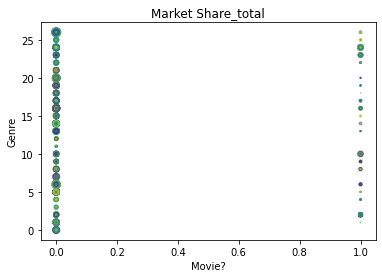

In [240]:
colors = np.random.rand(len(data))
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
plt.title("Market Share_total")
plt.xlabel(x_par)
plt.ylabel(y_par)
plt.show()

In [0]:
le.fit(data['Genre'].unique())
label_genre_encode = le.transform(data['Genre'])
x = data['Genre'].map(lambda x: (le.transform([str(x)])))

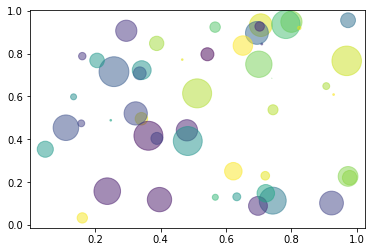

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = np.random.rand(N)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()